In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

         datetimestamp      ask      bid  volume
0  2016-03-01 15:00:00  1.08441  1.08428    1622
1  2016-03-01 15:15:00  1.08412  1.08397     958
2  2016-03-01 15:30:00  1.08726  1.08712    1239
3  2016-03-01 15:45:00  1.08603  1.08588    1185
4  2016-03-01 16:00:00  1.08430  1.08414    1268


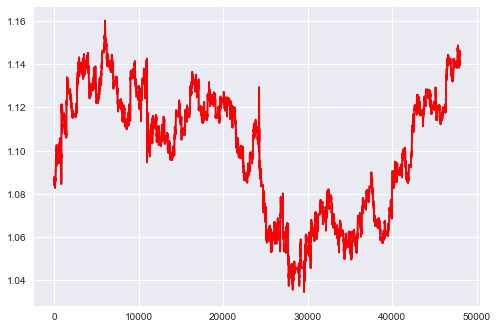

In [7]:
data15m = pd.read_csv('./Data/eur_usd.csv')
print(data15m.head())
plt.plot(data15m.ix[:, "bid"].tolist())
plt.plot(data15m.ix[:, "ask"].tolist(), color="red")
plt.show()

In [8]:
# parameters for dataProcess
WINDOW = 50  # размер входных данных
EMB_SIZE = 1  # попытаться без него
STEP = 1  # шаг преобразования
FORECAST = 5  # предсказание вперед

In [ ]:
def create_table(data):
    X, Y = [], []
    for i in range(0, len(data)-WINDOW-FORECAST, STEP): 
        try:
            x_i = data[i:i+WINDOW]
            y_i = data[i+WINDOW+FORECAST]  

            last_close = x_i[WINDOW-1]
            next_close = y_i

            if last_close < next_close:
                y_i = [1, 0]
            else:
                y_i = [0, 1] 

        except Exception as e:
            print e
            break

        X.append(x_i)
        Y.append(y_i)

    X = [(np.array(x) - np.mean(x)) / np.std(x) for x in X]

In [ ]:
data = data0.ix[:, 'Adj Close'].tolist()